# Loan Prediction Project

This notebook covers the process of predicting loan approval status based on various applicant features.  
It includes data exploration, preprocessing, model training, and evaluation.


In [5]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings("ignore")


# Load Dataset

In [6]:

# Load train and test datasets
df_train = pd.read_csv(r'C:\Users\USER\Desktop\Machine Learning Projects\Loan Prediction\train_set.csv')
df_test = pd.read_csv(r'C:\Users\USER\Desktop\Machine Learning Projects\Loan Prediction\test_set.csv')


# Dataset Preview 

In [7]:
print(df_train.shape)
print(df_test.shape)

(614, 13)
(367, 12)


In [8]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
df_test.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# Exploratory Data Analysis

In [10]:
df_train.info()
df_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Check Missing Values

In [11]:
df_train.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
df_test.isnull().sum()


Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

# Target Variable Distribution

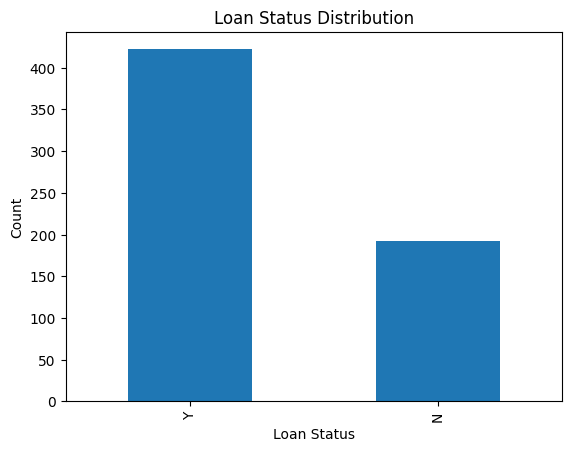

In [13]:
df_train['Loan_Status'].value_counts().plot(kind='bar', title='Loan Status Distribution')
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()


# Data Preprocessing

In [14]:
# Fill missing values using mode (categorical) and median (numerical)
df_train.fillna(df_train.mode().iloc[0], inplace=True)
df_test.fillna(df_test.mode().iloc[0], inplace=True)


In [15]:
# Save the target column (Loan_Status)
# Convert target labels Y/N to 1/0
y = df_train['Loan_Status'].map({'Y': 1, 'N': 0})


# Label Encoding

In [16]:
# Combine train and test (but without Loan_Status)
# Drop Loan_Status and add a helper column to separate later
df_train.drop('Loan_Status', axis=1, inplace=True)
df_train['is_train'] = 1
df_test['is_train'] = 0

# Combine for consistent one-hot encoding
combined = pd.concat([df_train, df_test], axis=0)

# Drop Loan_ID (not useful for prediction)
combined.drop('Loan_ID', axis=1, inplace=True)

# One-hot encode all categorical features
combined_encoded = pd.get_dummies(combined)


# Splitting back  the Dataset

In [17]:
# Split back into train/test
df_train_encoded = combined_encoded[combined_encoded['is_train'] == 1].drop('is_train', axis=1)
df_test_encoded = combined_encoded[combined_encoded['is_train'] == 0].drop('is_train', axis=1)

# Now split into features and labels
X = df_train_encoded
# y is already created from step 2

# Train/validation split
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
print(df_train_encoded.columns)


Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')


# Model Training

### Random Forest Model

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train
rf_model = RandomForestClassifier(random_state=42,class_weight='balanced')
rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [20]:
# Predict
y_pred_rf = rf_model.predict(X_val)

 RANDOM FOREST EVALUATION
Accuracy: 0.7804878048780488

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123



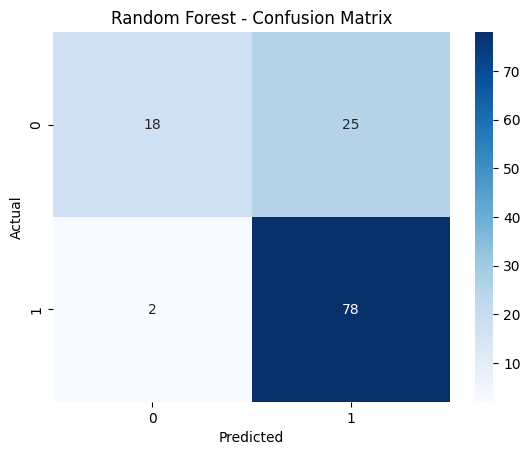

In [21]:

# Evaluation
print(" RANDOM FOREST EVALUATION")
print("Accuracy:", accuracy_score(y_val, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_val, y_pred_rf))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_val, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### prediction on test set

In [22]:
final_preds = rf_model.predict(df_test_encoded)

submission = pd.DataFrame({
    'Loan_ID': df_test['Loan_ID'],  # use original test file
    'Loan_Status': ['Y' if pred == 1 else 'N' for pred in final_preds]
})

In [23]:
final_preds

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

### LOGISTIC REGRESSION

In [24]:
from sklearn.linear_model import LogisticRegression

# Train
log_model = LogisticRegression(max_iter=1000, class_weight='balanced')
log_model.fit(X_train, y_train)



LogisticRegression(class_weight='balanced', max_iter=1000)

In [25]:
# Predict
y_pred_log = log_model.predict(X_val)
y_pred_log 

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1])

 LOGISTIC REGRESSION EVALUATION
Accuracy: 0.7398373983739838

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.53      0.59        43
           1       0.77      0.85      0.81        80

    accuracy                           0.74       123
   macro avg       0.71      0.69      0.70       123
weighted avg       0.73      0.74      0.73       123



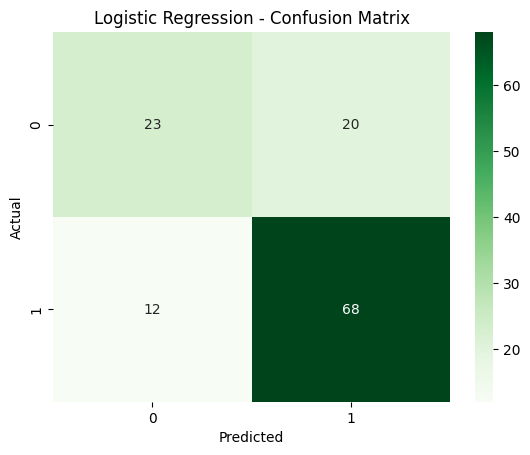

In [26]:
# Evaluation
print(" LOGISTIC REGRESSION EVALUATION")
print("Accuracy:", accuracy_score(y_val, y_pred_log))
print("\nClassification Report:\n", classification_report(y_val, y_pred_log))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_val, y_pred_log), annot=True, fmt='d', cmap='Greens')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### XGBoost Classifier

In [27]:
!pip install xgboost




[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\USER\Miniconda3\python.exe -m pip install --upgrade pip


In [28]:
from sklearn.model_selection import train_test_split

# Assuming you already have df_train_encoded and target y from earlier
#X = df_train_encoded
#y = df_train['Loan_Status'].map({'Y': 1, 'N': 0})  # or reuse saved 'y'

# Split into training and validation sets
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
# Train XGBoost
#from xgboost import XGBClassifier

#xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=1)
#xgb_model.fit(X_train, y_train)
